## Multi Armed Bandits Simulation
In this assignment you will simulate multi-armed bandits with different behaviours using numpy, there are a total of 3 different behaviours:
- One with probabilistic behaviour, which gives different outputs with a probability
- One which gives you a noisy reward, for each input

Note : All the rewards (or mean rewards) should be randomly generated and should not be hardcoded

In [1]:
# Import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt

The probabilistic behaviour means for each of the arms there will be a randomly generated set of rewards, {r_1, r_2, ..., r_k} and randomly generated set of probabilities {p_1, p_2, ..., p_k}. After pulling any arm, you should choose one of the rewards in its reward set with its corresponding probability and return it. The choice of value of k is upto you, but you will need numpy for k > 2.

In [2]:
class MAB_probabilistic:
    def __init__(self, num_action : int = 10) -> None:
        # Code Here #
        self.num_actions = num_actions
        self.true_rewards = [np.random.random(size=np.random.randint(1, 5)) for _ in range(num_actions)]
        self.probabilities = [np.random.dirichlet(np.ones(len(rewards))) for rewards in self.true_rewards]

        pass
    def act(self, action : int) -> float:
        # Code Here #
        chosen_reward = np.random.choice(self.true_rewards[action], p=self.probabilities[action])
        return chosen_reward
        pass

The noisy policy means for each arm, you should return a reward chosen from an underlying probability distribution (like gaussian, you can use numpy for this purpose) with a randomly generated mean and the given variance (passed to \_\_init\_\_)

In [3]:
class MAB_noisy:
    def __init__(self, noise_variance : float, num_action : int = 10) -> None:
        # Code Here #
        self.num_actions = num_actions
        self.noise_variance = noise_variance
        self.reward_means = np.random.random(size=num_actions)
        pass
    def act(self, action : int) -> float:
        # Code Here #
        noisy_reward = np.random.normal(self.reward_means[action], self.noise_variance)
        return noisy_reward
        pass

Initialize MAB_probabilistic with number of actions 5.
Perform an action for a fixed number of time and plot the average of first n rewards against n. Make such graphs for all 5 actions in single plot.

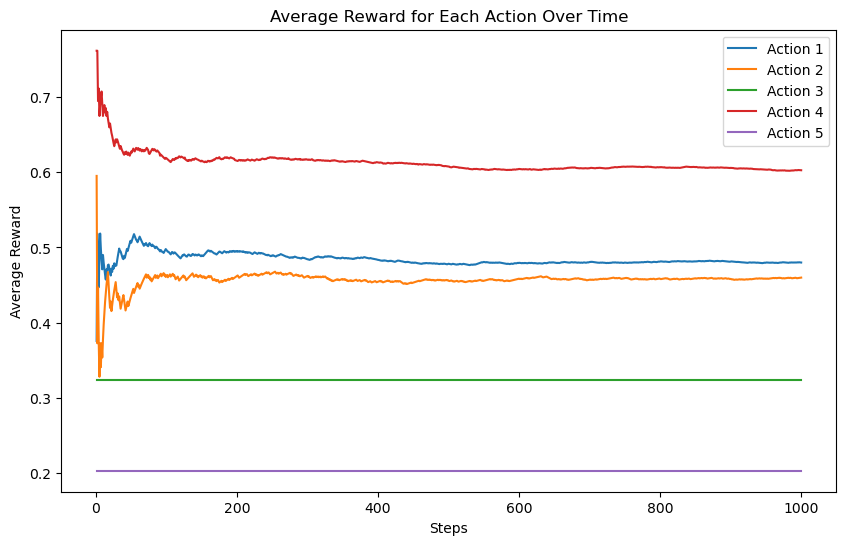

In [4]:
def run_experiment(mab, num_steps):
    rewards_per_action = [[] for _ in range(mab.num_actions)]

    for step in range(num_steps):
        for action in range(mab.num_actions):
            reward = mab.act(action)
            rewards_per_action[action].append(reward)

    average_rewards_per_action = [np.mean(rewards[:n]) for rewards in rewards_per_action for n in range(1, num_steps + 1)]
    return average_rewards_per_action

num_actions = 5
mab_probabilistic = MAB_probabilistic(num_actions)

num_steps = 1000
average_rewards = run_experiment(mab_probabilistic, num_steps)

plt.figure(figsize=(10, 6))
for action in range(num_actions):
    start_index = action * num_steps
    end_index = (action + 1) * num_steps
    plt.plot(range(1, num_steps + 1), average_rewards[start_index:end_index], label=f'Action {action + 1}')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward for Each Action Over Time')
plt.legend()
plt.show()

Initialize MAB_noisy with number of actions 5.
Perform an action for a fixed number of time and plot the nth rewards against n. Make such graphs for all 5 actions in single plot.

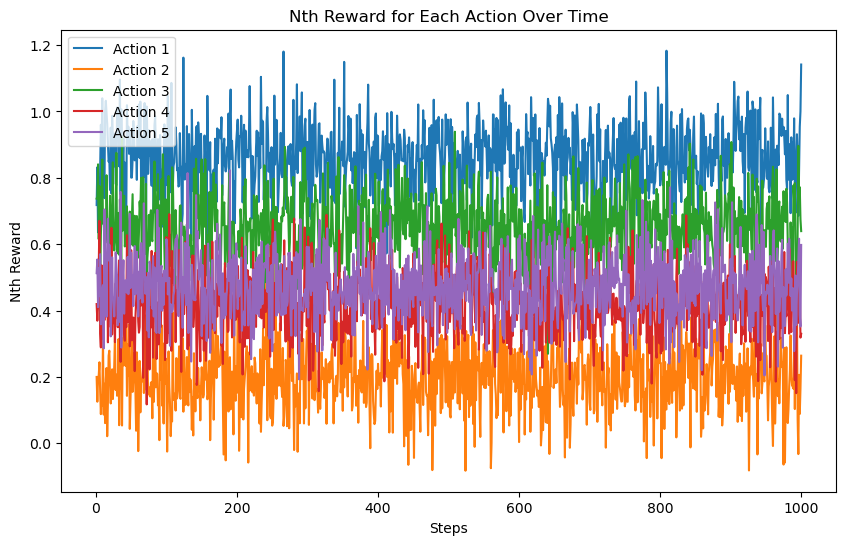

In [5]:
def run_experiment(mab, num_steps):
    rewards_per_action = [[] for _ in range(mab.num_actions)]

    for step in range(num_steps):
        for action in range(mab.num_actions):
            reward = mab.act(action)
            rewards_per_action[action].append(reward)

    nth_rewards_per_action = [rewards[:num_steps] for rewards in rewards_per_action]
    return nth_rewards_per_action

num_actions = 5
noise_variance = 0.1
mab_noisy = MAB_noisy(noise_variance, num_actions)

num_steps = 1000
nth_rewards = run_experiment(mab_noisy, num_steps)

plt.figure(figsize=(10, 6))
for action in range(num_actions):
    plt.plot(range(1, num_steps + 1), nth_rewards[action], label=f'Action {action + 1}')

plt.xlabel('Steps')
plt.ylabel('Nth Reward')
plt.title('Nth Reward for Each Action Over Time')
plt.legend()
plt.show()

Optional : Initialize any one of the above classes and find the optimal action, you can only use act() function and cannot access any class variables. Please do not search for methods on google or anywhere else, this is just a simple exercise for your own thinking.

In [6]:
def find_optimal_action(mab, num_steps):
    total_rewards = np.zeros(mab.num_actions)

    for step in range(num_steps):
        for action in range(mab.num_actions):
            reward = mab.act(action)
            total_rewards[action] += reward

    optimal_action = np.argmax(total_rewards)
    return optimal_action

num_actions = 5
noise_variance = 0.1
mab_noisy = MAB_noisy(noise_variance, num_actions)

num_steps = 1000
optimal_action = find_optimal_action(mab_noisy, num_steps)

print(f"The optimal action is: {optimal_action + 1}")

The optimal action is: 5
